In [83]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import tensorflow as tf
from tensorflow import keras
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.neighbors import KNeighborsRegressor


In [84]:
data=pd.read_csv('/content/rainfall_in_india_1901-2015[1].csv')

In [85]:
data

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4111,LAKSHADWEEP,2011,5.1,2.8,3.1,85.9,107.2,153.6,350.2,254.0,255.2,117.4,184.3,14.9,1533.7,7.9,196.2,1013.0,316.6
4112,LAKSHADWEEP,2012,19.2,0.1,1.6,76.8,21.2,327.0,231.5,381.2,179.8,145.9,12.4,8.8,1405.5,19.3,99.6,1119.5,167.1
4113,LAKSHADWEEP,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3,60.6,131.1,1057.0,177.6
4114,LAKSHADWEEP,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0,69.3,76.7,958.5,290.5


In [86]:
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [87]:
data.tail()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
4111,LAKSHADWEEP,2011,5.1,2.8,3.1,85.9,107.2,153.6,350.2,254.0,255.2,117.4,184.3,14.9,1533.7,7.9,196.2,1013.0,316.6
4112,LAKSHADWEEP,2012,19.2,0.1,1.6,76.8,21.2,327.0,231.5,381.2,179.8,145.9,12.4,8.8,1405.5,19.3,99.6,1119.5,167.1
4113,LAKSHADWEEP,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3,60.6,131.1,1057.0,177.6
4114,LAKSHADWEEP,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0,69.3,76.7,958.5,290.5
4115,LAKSHADWEEP,2015,2.2,0.5,3.7,87.1,133.1,296.6,257.5,146.4,160.4,165.4,231.0,159.0,1642.9,2.7,223.9,860.9,555.4


In [88]:
data.shape

(4116, 19)

In [89]:
data.isna().sum()

SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL         26
Jan-Feb         6
Mar-May         9
Jun-Sep        10
Oct-Dec        13
dtype: int64

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4112 non-null   float64
 3   FEB          4113 non-null   float64
 4   MAR          4110 non-null   float64
 5   APR          4112 non-null   float64
 6   MAY          4113 non-null   float64
 7   JUN          4111 non-null   float64
 8   JUL          4109 non-null   float64
 9   AUG          4112 non-null   float64
 10  SEP          4110 non-null   float64
 11  OCT          4109 non-null   float64
 12  NOV          4105 non-null   float64
 13  DEC          4106 non-null   float64
 14  ANNUAL       4090 non-null   float64
 15  Jan-Feb      4110 non-null   float64
 16  Mar-May      4107 non-null   float64
 17  Jun-Sep      4106 non-null   float64
 18  Oct-Dec      4103 non-null   float64
dtypes: flo

In [91]:
data.dtypes

SUBDIVISION     object
YEAR             int64
JAN            float64
FEB            float64
MAR            float64
APR            float64
MAY            float64
JUN            float64
JUL            float64
AUG            float64
SEP            float64
OCT            float64
NOV            float64
DEC            float64
ANNUAL         float64
Jan-Feb        float64
Mar-May        float64
Jun-Sep        float64
Oct-Dec        float64
dtype: object

In [92]:
data.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,4116.000000,4112.000000,4113.000000,4110.000000,4112.000000,4113.000000,4111.000000,4109.000000,4112.000000,4110.000000,4109.000000,4105.000000,4106.000000,4090.000000,4110.000000,4107.000000,4106.000000,4103.000000
mean,1958.218659,18.957320,21.805325,27.359197,43.127432,85.745417,230.234444,347.214334,290.263497,197.361922,95.507009,39.866163,18.870580,1411.008900,40.747786,155.901753,1064.724769,154.100487
std,33.140898,33.585371,35.909488,46.959424,67.831168,123.234904,234.710758,269.539667,188.770477,135.408345,99.519134,68.685410,42.369611,903.846565,59.308277,201.316965,707.741531,166.942660
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,62.300000,0.000000,0.000000,57.400000,0.000000
25%,1930.000000,0.600000,0.600000,1.000000,3.000000,8.600000,70.350000,175.600000,155.975000,100.525000,14.600000,0.700000,0.100000,804.500000,4.100000,24.050000,573.850000,34.200000
50%,1958.000000,6.000000,6.700000,7.800000,15.700000,36.600000,138.700000,284.800000,259.400000,173.900000,65.200000,9.500000,3.000000,1121.300000,19.200000,74.800000,881.100000,98.200000
75%,1987.000000,22.200000,26.800000,31.300000,49.950000,97.200000,305.150000,418.400000,377.800000,265.800000,148.400000,46.100000,17.500000,1644.775000,50.375000,196.950000,1288.175000,213.500000
max,2015.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4536.900000,1252.500000


<ipython-input-93-8b96879b4d02>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

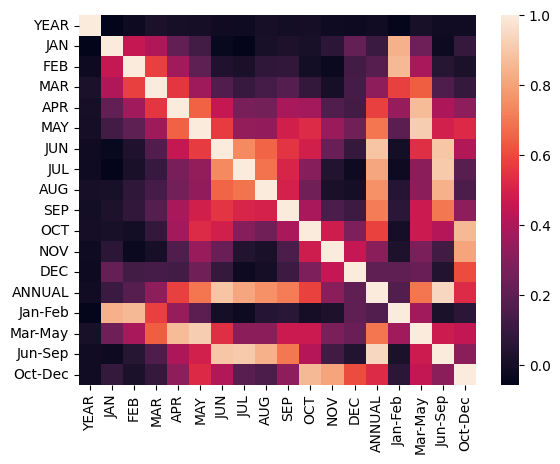

In [93]:
sns.heatmap(data.corr())

In [94]:
print(data.nunique())

SUBDIVISION      36
YEAR            115
JAN             802
FEB             898
MAR             978
APR            1234
MAY            1731
JUN            2722
JUL            3050
AUG            2913
SEP            2632
OCT            1939
NOV            1239
DEC             801
ANNUAL         3712
Jan-Feb        1220
Mar-May        2262
Jun-Sep        3683
Oct-Dec        2389
dtype: int64


<Axes: >

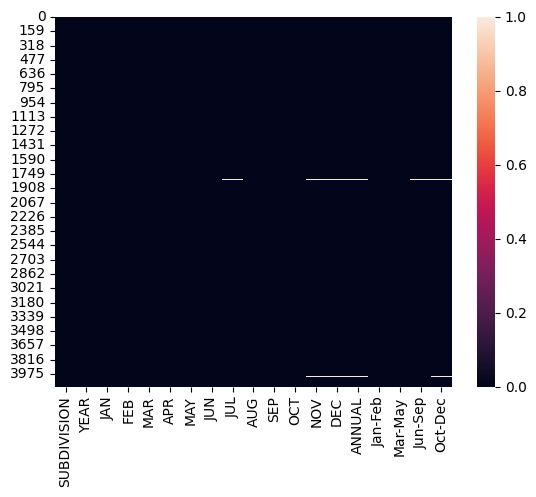

In [95]:
sns.heatmap(data.isnull())

In [96]:
skew_val = data.skew().sort_values(ascending=False)
skew_val

<ipython-input-96-e727757b7d67>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skew_val = data.skew().sort_values(ascending=False)


DEC        5.235442
JAN        4.308682
MAR        3.209430
Jan-Feb    2.985826
FEB        2.981003
APR        2.829728
NOV        2.785793
MAY        2.389982
Mar-May    2.115681
JUL        2.100887
Oct-Dec    1.905195
JUN        1.739081
AUG        1.655205
Jun-Sep    1.506229
OCT        1.498712
ANNUAL     1.319522
SEP        1.313365
YEAR      -0.005723
dtype: float64

In [97]:
corr = data.corr()
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)[12:24:2]

<ipython-input-97-442481aad611>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


ANNUAL   ANNUAL     1.000000
Mar-May  Mar-May    1.000000
FEB      FEB        1.000000
ANNUAL   Jun-Sep    0.943661
MAY      Mar-May    0.915019
JUL      Jun-Sep    0.907723
dtype: float64

In [98]:
data.columns

Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec'],
      dtype='object')

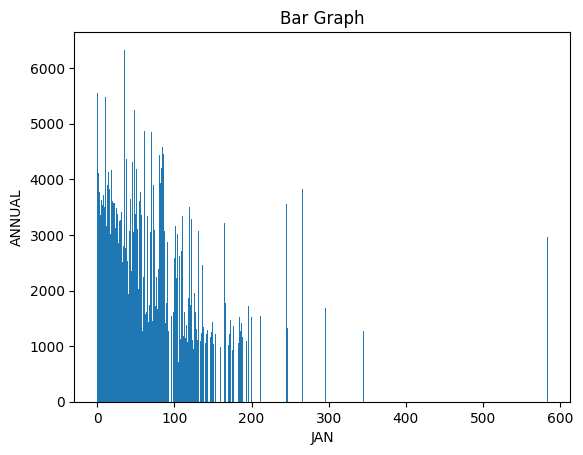

In [99]:
import matplotlib.pyplot as plt
x1 = data['JAN']
y = data['ANNUAL']
plt.bar(x1, y)
plt.xlabel('JAN')
plt.ylabel('ANNUAL')
plt.title('Bar Graph')
plt.show()


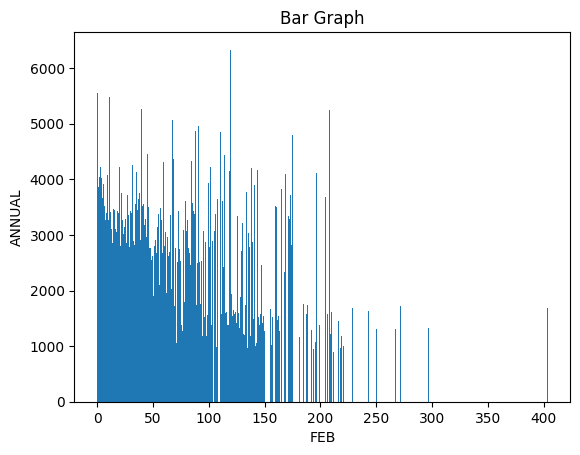

In [100]:
import matplotlib.pyplot as plt
x2 = data['FEB']
y = data['ANNUAL']
plt.bar(x2, y)
plt.xlabel('FEB')
plt.ylabel('ANNUAL')
plt.title('Bar Graph')
plt.show()

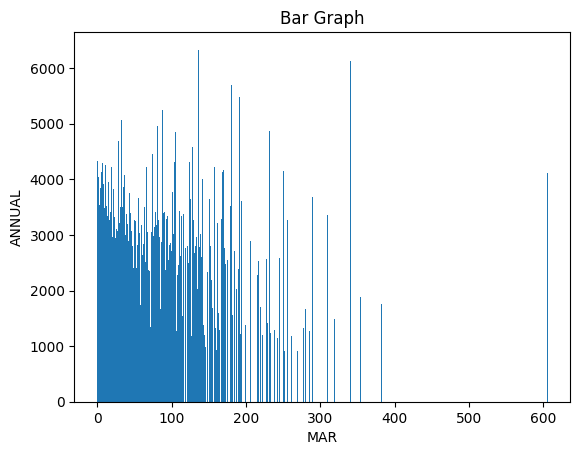

In [101]:
import matplotlib.pyplot as plt
x3 = data['MAR']
y = data['ANNUAL']
plt.bar(x3, y)
plt.xlabel('MAR')
plt.ylabel('ANNUAL')
plt.title('Bar Graph')
plt.show()

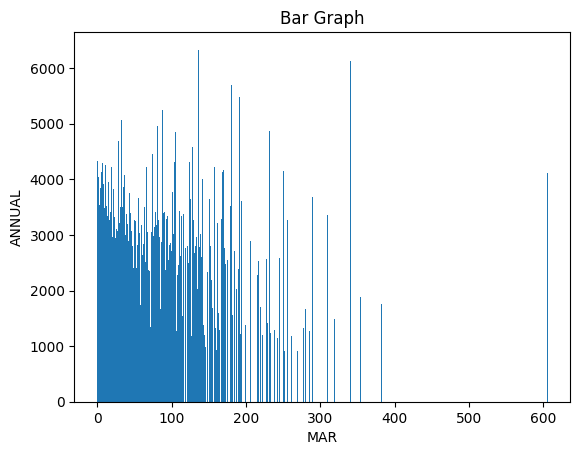

In [102]:
import matplotlib.pyplot as plt

x4 = data['MAR']
y = data['ANNUAL']

plt.bar(x4, y)
plt.xlabel('MAR')
plt.ylabel('ANNUAL')
plt.title('Bar Graph')
plt.show()

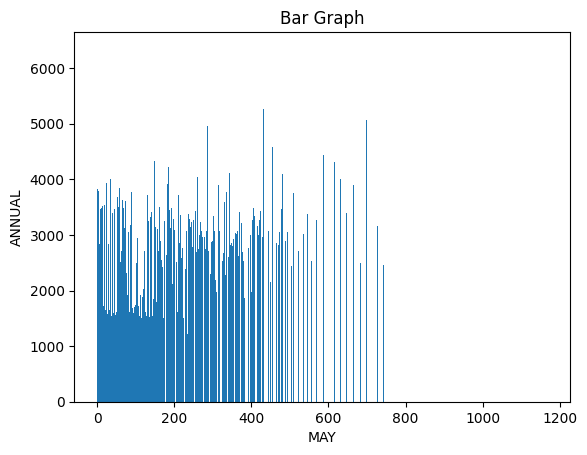

In [103]:
import matplotlib.pyplot as plt

x5 = data['MAY']
y = data['ANNUAL']

plt.bar(x5, y)
plt.xlabel('MAY')
plt.ylabel('ANNUAL')
plt.title('Bar Graph')
plt.show()

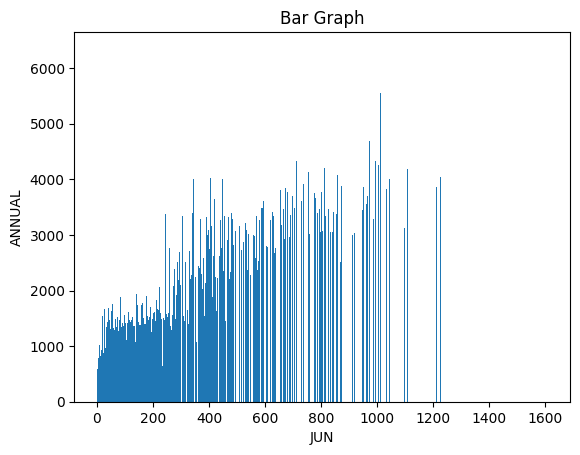

In [104]:
import matplotlib.pyplot as plt

x6 = data['JUN']
y = data['ANNUAL']

plt.bar(x6, y)
plt.xlabel('JUN')
plt.ylabel('ANNUAL')
plt.title('Bar Graph')
plt.show()

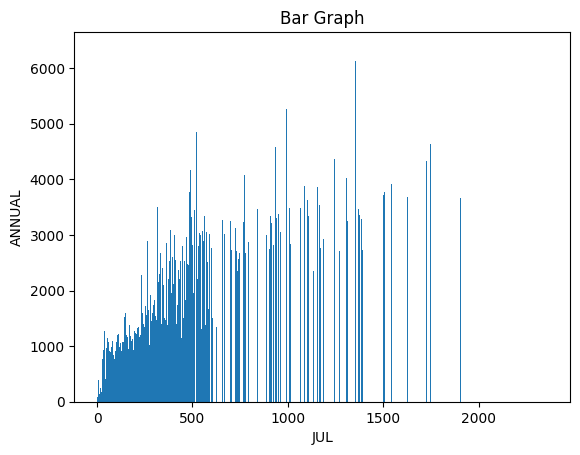

In [105]:
import matplotlib.pyplot as plt

x7 = data['JUL']
y = data['ANNUAL']

plt.bar(x7, y)
plt.xlabel('JUL')
plt.ylabel('ANNUAL')
plt.title('Bar Graph')
plt.show()

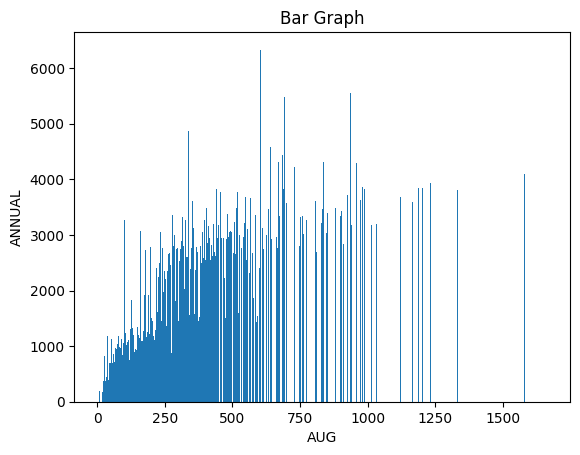

In [106]:
import matplotlib.pyplot as plt

x8 = data['AUG']
y = data['ANNUAL']

plt.bar(x8, y)
plt.xlabel('AUG')
plt.ylabel('ANNUAL')
plt.title('Bar Graph')
plt.show()

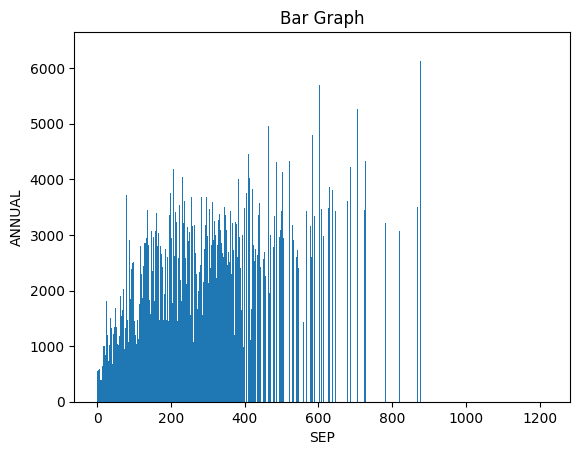

In [107]:
import matplotlib.pyplot as plt

x9 = data['SEP']
y = data['ANNUAL']

plt.bar(x9, y)
plt.xlabel('SEP')
plt.ylabel('ANNUAL')
plt.title('Bar Graph')
plt.show()

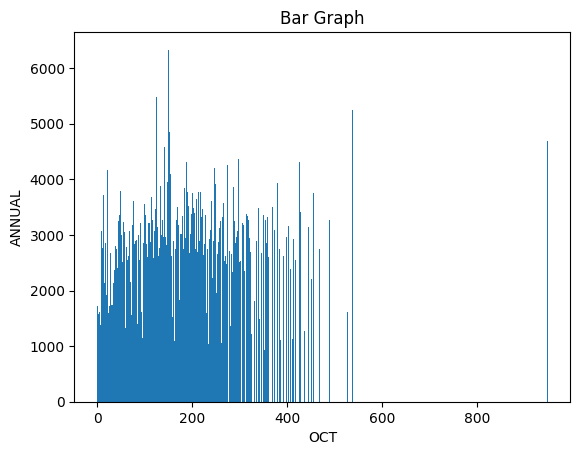

In [108]:
import matplotlib.pyplot as plt

x10 = data['OCT']
y = data['ANNUAL']

plt.bar(x10, y)
plt.xlabel('OCT')
plt.ylabel('ANNUAL')
plt.title('Bar Graph')
plt.show()

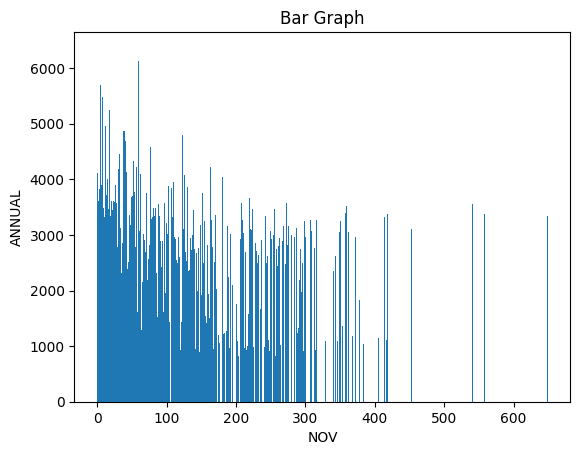

In [109]:
import matplotlib.pyplot as plt

x11 = data['NOV']
y = data['ANNUAL']

plt.bar(x11, y)
plt.xlabel('NOV')
plt.ylabel('ANNUAL')
plt.title('Bar Graph')
plt.show()

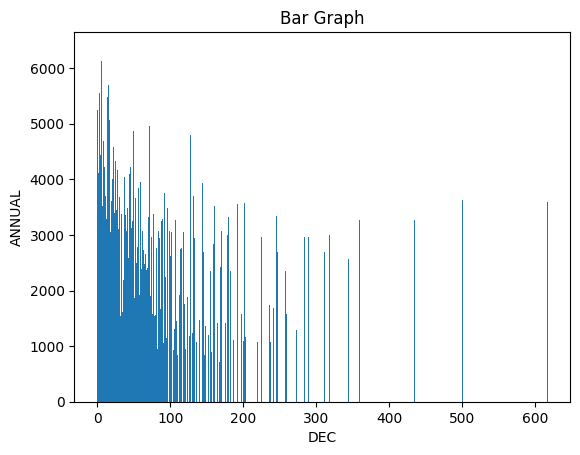

In [110]:
import matplotlib.pyplot as plt

x12 = data['DEC']
y = data['ANNUAL']

plt.bar(x12, y)
plt.xlabel('DEC')
plt.ylabel('ANNUAL')
plt.title('Bar Graph')
plt.show()

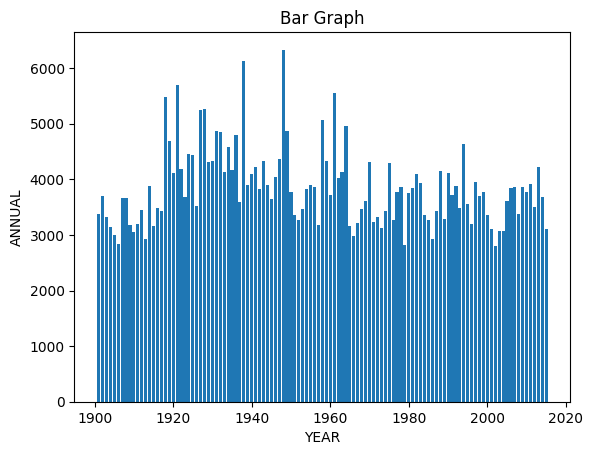

In [111]:
import matplotlib.pyplot as plt

x13 = data['YEAR']
y = data['ANNUAL']

plt.bar(x13, y)
plt.xlabel('YEAR')
plt.ylabel('ANNUAL')
plt.title('Bar Graph')
plt.show()

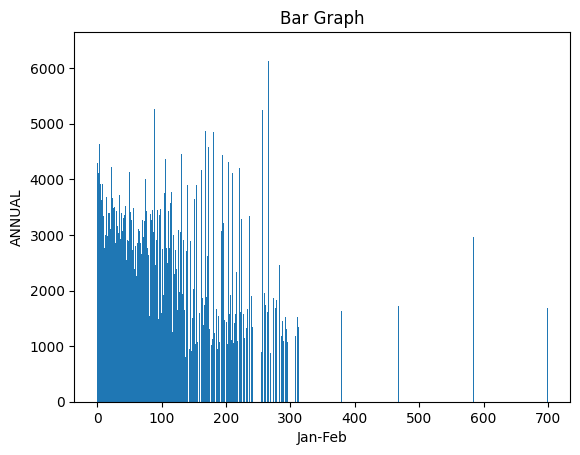

In [112]:
import matplotlib.pyplot as plt

x14 = data['Jan-Feb']
y = data['ANNUAL']

plt.bar(x14, y)
plt.xlabel('Jan-Feb')
plt.ylabel('ANNUAL')
plt.title('Bar Graph')
plt.show()

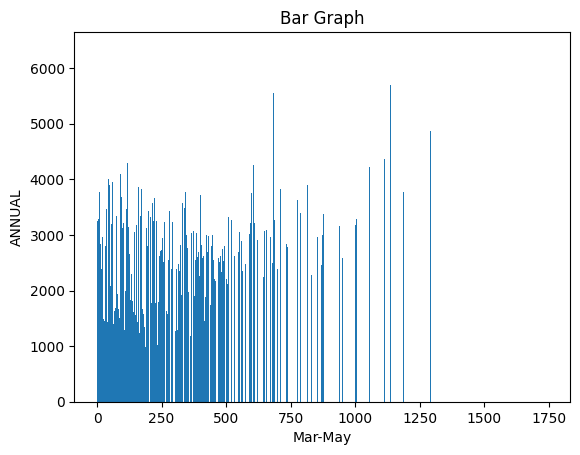

In [113]:
import matplotlib.pyplot as plt

x15 = data['Mar-May']
y = data['ANNUAL']

plt.bar(x15, y)
plt.xlabel('Mar-May')
plt.ylabel('ANNUAL')
plt.title('Bar Graph')
plt.show()

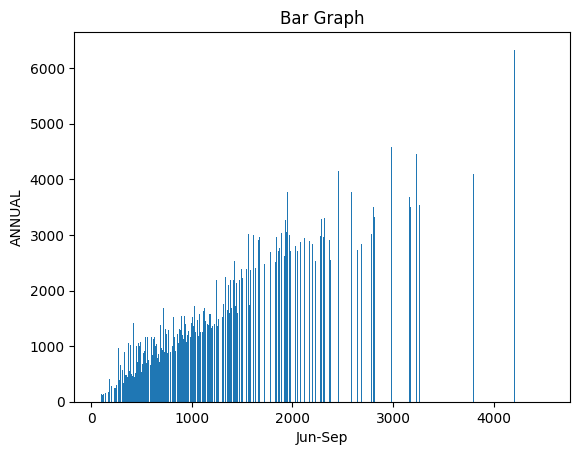

In [114]:
import matplotlib.pyplot as plt

x16 = data['Jun-Sep']
y = data['ANNUAL']

plt.bar(x16, y)
plt.xlabel('Jun-Sep')
plt.ylabel('ANNUAL')
plt.title('Bar Graph')
plt.show()

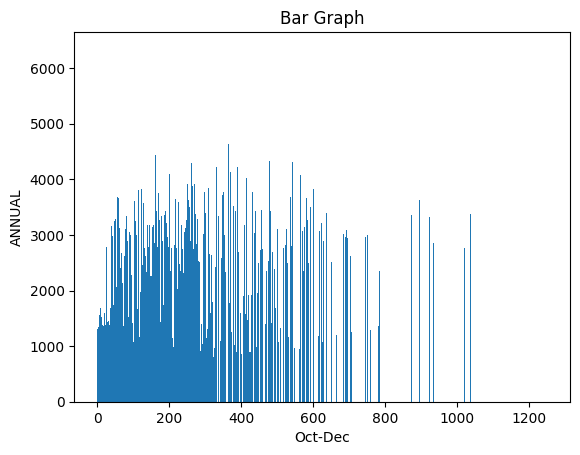

In [115]:
import matplotlib.pyplot as plt

x17 = data['Oct-Dec']
y = data['ANNUAL']

plt.bar(x17, y)
plt.xlabel('Oct-Dec')
plt.ylabel('ANNUAL')
plt.title('Bar Graph')
plt.show()

In [116]:
data=data.dropna()

In [117]:
x=data.drop(['ANNUAL','SUBDIVISION','YEAR'] ,axis=1)
y=data['ANNUAL']
print(x)

       JAN    FEB   MAR    APR    MAY    JUN    JUL    AUG    SEP    OCT  \
0     49.2   87.1  29.2    2.3  528.8  517.5  365.1  481.1  332.6  388.5   
1      0.0  159.8  12.2    0.0  446.1  537.1  228.9  753.7  666.2  197.2   
2     12.7  144.0   0.0    1.0  235.1  479.9  728.4  326.7  339.0  181.2   
3      9.4   14.7   0.0  202.4  304.5  495.1  502.0  160.1  820.4  222.2   
4      1.3    0.0   3.3   26.9  279.5  628.7  368.7  330.5  297.0  260.7   
...    ...    ...   ...    ...    ...    ...    ...    ...    ...    ...   
4111   5.1    2.8   3.1   85.9  107.2  153.6  350.2  254.0  255.2  117.4   
4112  19.2    0.1   1.6   76.8   21.2  327.0  231.5  381.2  179.8  145.9   
4113  26.2   34.4  37.5    5.3   88.3  426.2  296.4  154.4  180.0   72.8   
4114  53.2   16.1   4.4   14.9   57.4  244.1  116.1  466.1  132.2  169.2   
4115   2.2    0.5   3.7   87.1  133.1  296.6  257.5  146.4  160.4  165.4   

        NOV    DEC  Jan-Feb  Mar-May  Jun-Sep  Oct-Dec  
0     558.2   33.6    136.3   

In [118]:
print(y)

0       3373.2
1       3520.7
2       2957.4
3       3079.6
4       2566.7
         ...  
4111    1533.7
4112    1405.5
4113    1426.3
4114    1395.0
4115    1642.9
Name: ANNUAL, Length: 4090, dtype: float64


In [119]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=True)
lin_reg_model=LinearRegression()
reg=lin_reg_model.fit(x_train,y_train)
w=reg.score(x_test,y_test)
reg.score(x_train,y_train)
train_prediction=lin_reg_model.predict(x_train)
error_score=metrics.r2_score(y_train,train_prediction)
print(error_score)

0.9999999960226824


In [120]:
from sklearn import linear_model
lasso_reg=linear_model.Lasso(alpha=50,max_iter=100,tol=0.1)
lasso_reg.fit(x_train,y_train)
j=lasso_reg.score(x_test,y_test)
trainl_prediction=lasso_reg.predict(x_train)
error2_score=metrics.r2_score(y_train,trainl_prediction)
print(error2_score)
jj=lasso_reg.score(x_train,y_train)

0.9971251938429514


In [121]:
from sklearn.linear_model import Ridge
Ridge_reg=linear_model.Ridge(alpha=50,max_iter=100,tol=0.1)
Ridge_reg.fit(x_train,y_train)
trainr_prediction=Ridge_reg.predict(x_train)
error_scorer=metrics.r2_score(y_train,trainr_prediction)
print(error_scorer)
ff=Ridge_reg.score(x_train,y_train)
ll=Ridge_reg.score(x_test,y_test)

0.9999999960181732


In [122]:
svm_reg_model = SVR(kernel='linear')
svm_reg_model.fit(x_train,y_train)
svm_train_prediction = svm_reg_model.predict(x_train)
svm_error_score = metrics.r2_score(y_train, svm_train_prediction)
print("SVM Train R2 Score:", svm_error_score)

SVM Train R2 Score: 0.999999598856718


In [123]:
nn_model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])
nn_model.compile(optimizer='adam', loss='mean_squared_error')
nn_model.fit(x_train, y_train, epochs=50, batch_size=32, verbose=0)
nn_train_prediction = nn_model.predict(x_train)
nn_error_score = metrics.r2_score(y_train, nn_train_prediction)
print("Neural Network Train R2 Score:", nn_error_score)

116/116 [==============================] - 0s 760us/step
Neural Network Train R2 Score: 0.9999883799088479


In [124]:
def gradient_descent(x, y, learning_rate=0.01, epochs=1000):
    m, n = x.shape
    theta = np.zeros(n)
    cost_history = []

    for _ in range(epochs):
        y_pred = np.dot(x, theta)
        error = y_pred - y
        gradient = (1/m) * np.dot(x.T, error)
        theta -= learning_rate * gradient
        cost = (1/(2*m)) * np.sum(error**2)
        cost_history.append(cost)

    return theta, cost_history
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

theta, cost_history = gradient_descent(x_train_scaled, y_train)
train_gd_prediction = np.dot(x_train_scaled, theta)
gd_error_score = metrics.r2_score(y_train, train_gd_prediction)
print("Gradient Descent Train R2 Score:", gd_error_score)

Gradient Descent Train R2 Score: -1.4367833628678954


In [125]:
rf_reg_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_reg_model.fit(x_train, y_train)
rf_train_prediction = rf_reg_model.predict(x_train)
rf_error_score = metrics.r2_score(y_train, rf_train_prediction)
print("Random Forest Train R2 Score:", rf_error_score)

Random Forest Train R2 Score: 0.9992621426179189


In [126]:
bayesian_reg_model = BayesianRidge()
bayesian_reg_model.fit(x_train, y_train)
bayesian_train_prediction = bayesian_reg_model.predict(x_train)
bayesian_error_score = metrics.r2_score(y_train, bayesian_train_prediction)
print("Bayesian Ridge Train R2 Score:", bayesian_error_score)

Bayesian Ridge Train R2 Score: 0.9999999960226822


In [127]:
knn_reg_model = KNeighborsRegressor(n_neighbors=5)
knn_reg_model.fit(x_train, y_train)
knn_train_prediction = knn_reg_model.predict(x_train)
knn_error_score = metrics.r2_score(y_train, knn_train_prediction)
print("k-NN Train R2 Score:", knn_error_score)

k-NN Train R2 Score: 0.9945038253873397


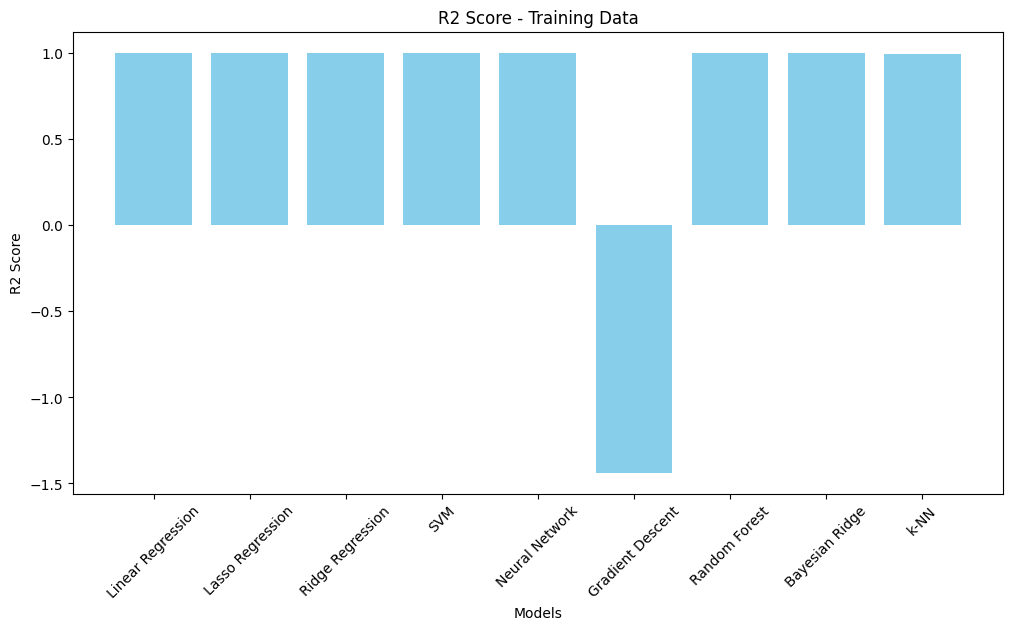

In [128]:
models = ["Linear Regression", "Lasso Regression", "Ridge Regression", "SVM", "Neural Network", "Gradient Descent",
          "Random Forest", "Bayesian Ridge", "k-NN"]
train_scores = [error_score, error2_score, error_scorer, svm_error_score, nn_error_score, gd_error_score, rf_error_score,
                bayesian_error_score, knn_error_score]

plt.figure(figsize=(12, 6))
plt.bar(models, train_scores, color='skyblue')
plt.title('R2 Score - Training Data')
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.xticks(rotation=45)
plt.show()